In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
ABS_PATH = os.path.abspath("")
IMG_PATH = os.path.join(ABS_PATH, "images")

frame = cv2.imread(os.path.join(IMG_PATH, "Colesdalen.JPG"))
frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
frame = cv2.resize(frame, (800, 500))

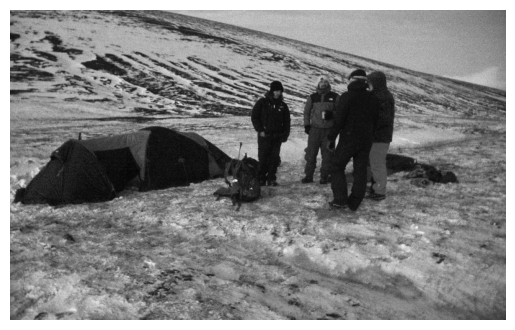

In [3]:
plt.imshow(frame, cmap="gray")
plt.axis("off");

$\displaystyle I=\log_2\left(P(e_i)\right)$

The Entropy $E$ is defined as the sum of the probabilities $e_i$ multiplied with the information content $I_i$

$\displaystyle E:= - \sum_{i=1...N}{P(e_i)\cdot \log_2\left(P(e_i)\right)}$

In [60]:
def get_information_content(frame):
    hist = np.histogram(frame, bins=256)[0]
    prob = hist/hist.sum()
    info = np.where(prob>1e-6, np.log2(prob), 0)
    return info

In [61]:
def get_entropy(frame):
    info = get_information_content(frame)
    hist = np.histogram(frame, bins=256)[0]
    prob = hist/hist.sum()
    
    entropy = -(prob * info)[~np.isnan(prob)].sum()
    return entropy

According to histogram equalization, we want to maximize the information content of the image. That means that the histogram of the image should be uniformly distributed.

In [62]:
get_entropy(frame)

C:\Users\moorb\AppData\Local\Temp\ipykernel_18092\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


6.544481825654289

In [63]:
def histogram_equalization(frame):
    hist = np.array([np.where(frame==i ,1 ,0).sum() for i in range(256)])
    prob = hist/hist.sum()
    transfer = np.cumsum(prob) - np.arange(256)/256 
    transfer = {i:val for i, val in enumerate(transfer)}
    return transfer

In [64]:
transfer = histogram_equalization(frame)

frame_he = np.ones_like(frame)
for i in range(frame.shape[0]):
    for j in range(frame.shape[1]):
        frame_he[i,j] = frame[i,j] * (1 + transfer[frame[i,j]])


C:\Users\moorb\AppData\Local\Temp\ipykernel_18092\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


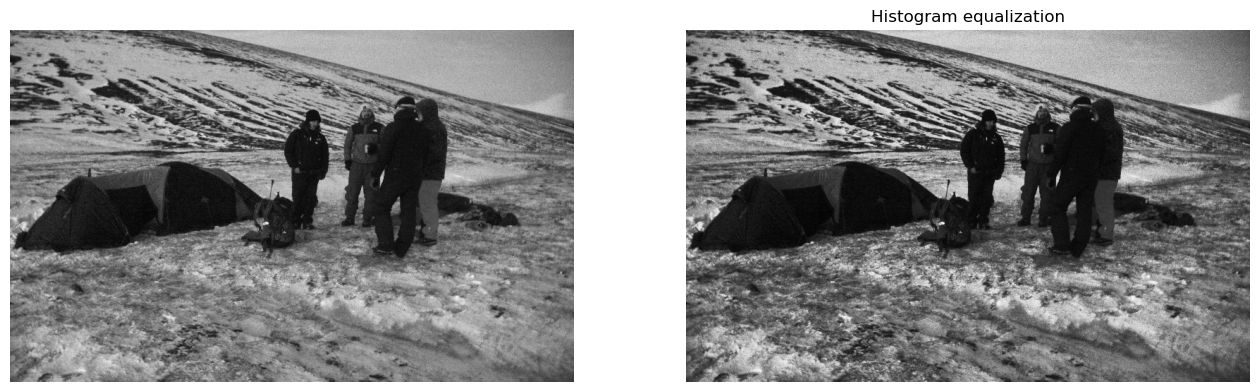

In [65]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.imshow(frame, cmap="gray")
ax2.imshow(frame_he, cmap="gray")
ax1.axis("off")
ax2.axis("off")
get_entropy(frame_he)
plt.title("Histogram equalization");

C:\Users\moorb\AppData\Local\Temp\ipykernel_18092\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


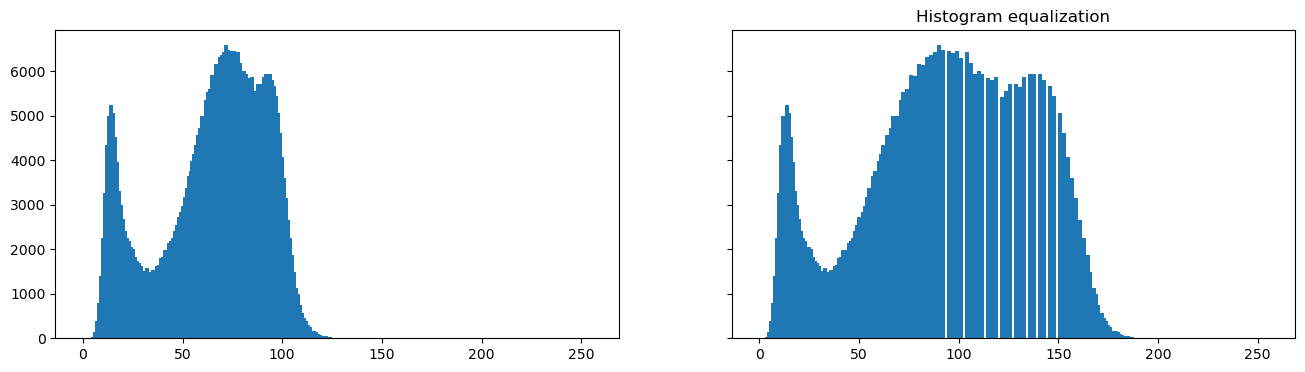

In [66]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4), sharex=True, sharey=True)


info = get_information_content(frame)
hist = np.array([np.where(frame==i, 1, 0).sum() for i in range(256)])
ax1.bar(np.arange(256), hist, width=2);
info = get_information_content(frame_he)
hist = np.array([np.where(frame_he==i, 1, 0).sum() for i in range(256)])
ax2.bar(np.arange(256), hist, width=2);
plt.title("Histogram equalization");

In [67]:
def adaptive_histogram_equalization(frame, n=3, k=396):
    frame_ahe = np.ones_like(frame)
    
    for i in range(n, frame.shape[0]-n, n*2):
        for j in range(k, frame.shape[1]-k, k*2):
            curr_frame = frame[i-n:i+n, j-k:j+k]
            transfer = histogram_equalization(curr_frame)
            
            for x in range(curr_frame.shape[0]):
                for y in range(curr_frame.shape[1]):
                    frame_ahe[i-n+x:i+n+x,j-k+y:j+k+y] = curr_frame[x,y] * (1 + transfer[curr_frame[x,y]])
        
    return frame_ahe

In [68]:
frame_ahe = adaptive_histogram_equalization(frame)

C:\Users\moorb\AppData\Local\Temp\ipykernel_18092\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


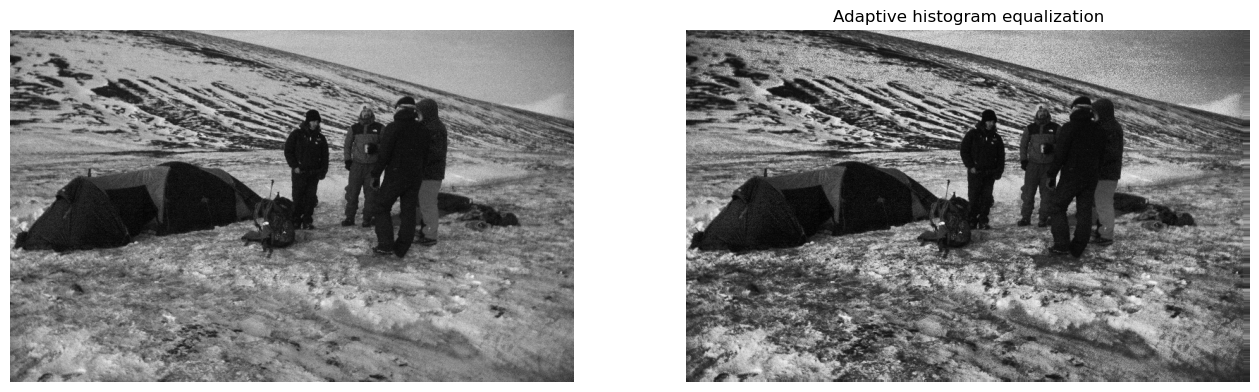

In [69]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.imshow(frame, cmap="gray")
ax2.imshow(frame_ahe, cmap="gray")
ax1.axis("off")
ax2.axis("off")
get_entropy(frame_ahe)
plt.title("Adaptive histogram equalization");

C:\Users\moorb\AppData\Local\Temp\ipykernel_18092\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


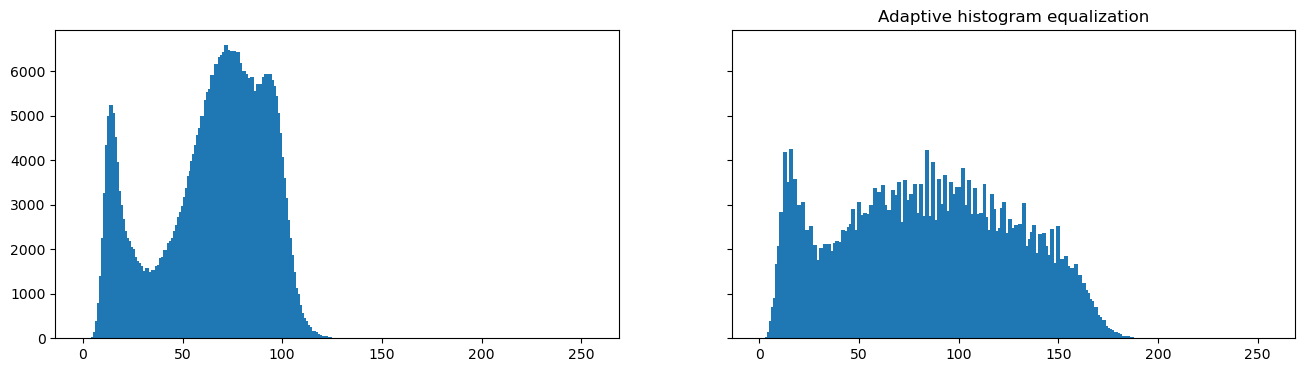

In [70]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4), sharex=True, sharey=True)


info = get_information_content(frame)
hist = np.array([np.where(frame==i, 1, 0).sum() for i in range(256)])
ax1.bar(np.arange(256), hist, width=2);
info = get_information_content(frame_ahe)
hist = np.array([np.where(frame_ahe==i, 1, 0).sum() for i in range(256)])
ax2.bar(np.arange(256), hist, width=2);
plt.title("Adaptive histogram equalization");

In [71]:
def contrast_limited_histogram_equalization(frame, t=0.5):
    frame_clahe = frame.copy()
    frame_clahe = t * frame_clahe + (1-t) * adaptive_histogram_equalization(frame)
    return frame_clahe

In [72]:
frame_clahe = contrast_limited_histogram_equalization(frame)

C:\Users\moorb\AppData\Local\Temp\ipykernel_18092\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


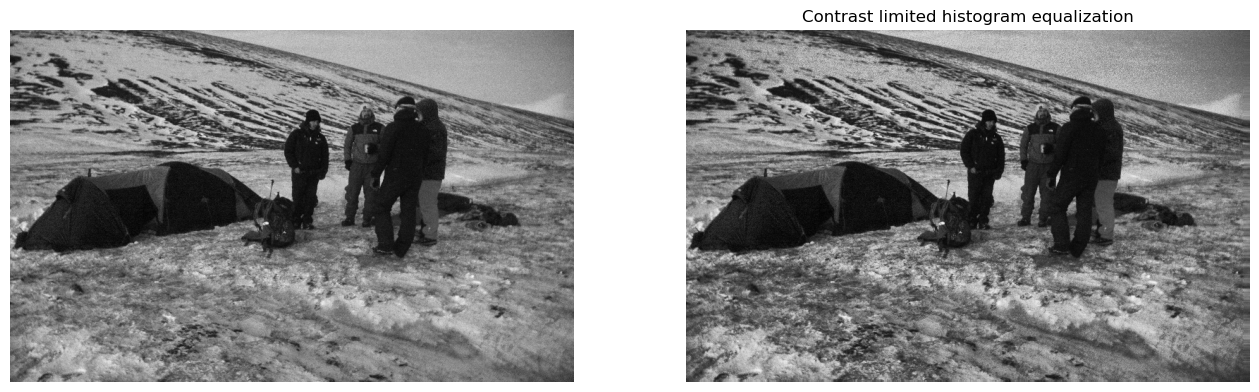

In [73]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.imshow(frame, cmap="gray")
ax2.imshow(frame_clahe, cmap="gray")
ax1.axis("off")
ax2.axis("off")
get_entropy(frame_clahe)
plt.title("Contrast limited histogram equalization");

C:\Users\moorb\AppData\Local\Temp\ipykernel_18092\3065536768.py:4: RuntimeWarning: divide by zero encountered in log2
  info = np.where(prob>1e-6, np.log2(prob), 0)


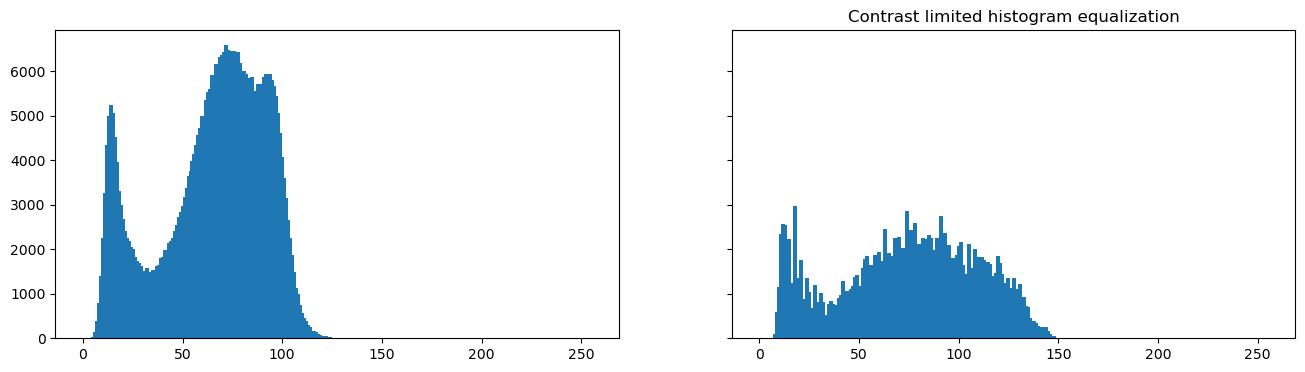

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4), sharex=True, sharey=True)


info = get_information_content(frame)
hist = np.array([np.where(frame==i, 1, 0).sum() for i in range(256)])
ax1.bar(np.arange(256), hist, width=2);
info = get_information_content(frame_clahe)
hist = np.array([np.where(frame_clahe==i, 1, 0).sum() for i in range(256)])
ax2.bar(np.arange(256), hist, width=2);
plt.title("Contrast limited histogram equalization");

$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} =  
\begin{pmatrix} \lambda ^ \gamma \\ \lambda ^ \gamma \\ \lambda ^ \gamma \end{pmatrix} + a \begin{pmatrix}-0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 & 0\end{pmatrix} \begin{pmatrix}\cos \phi \\ \sin \phi\end{pmatrix}$$
with $\phi = 2 \pi (\frac{\text{start\_color }}{3} + \text{rotations}\cdot \lambda)$ and $ a = \frac{\text{hue}\cdot \lambda ^ \gamma \cdot( 1 - \lambda ^ \gamma)}{2}$ (with 'start\_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).


$\begin{pmatrix}R \\ G \\ B\end{pmatrix}=\begin{pmatrix} \lambda ^ \gamma \\ \lambda ^ \gamma \\ \lambda ^ \gamma \end{pmatrix}+\frac{\text{hue}\cdot \lambda ^ \gamma \cdot( 1 - \lambda ^ \gamma)}{2}\begin{pmatrix}-0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 & 0\end{pmatrix}\begin{pmatrix}\cos{2 \pi (\frac{\text{start\_color }}{3} + \text{rotations}\cdot \lambda)} \\ \sin{2 \pi (\frac{\text{start\_color }}{3} + \text{rotations}\cdot \lambda)}\end{pmatrix}$

$\gamma=1, \\\mathrm{start\_ color}=0,\\ \mathrm{rotation}=1$

$\begin{pmatrix}R \\ G \\ B\end{pmatrix}=\begin{pmatrix} x \\ x \\ x \end{pmatrix}+\frac{\text{hue}\cdot x \cdot( 1 - x)}{2}\cdot m \begin{pmatrix}\cos{2 \pi (x)} \\ \sin{2 \pi (x)}\end{pmatrix}$

$\begin{pmatrix}R-x \\ G-x \\ B-x\end{pmatrix}=\frac{\text{hue}\cdot x \cdot( 1 - x)}{2}\cdot m \begin{pmatrix}1 \\ 0\end{pmatrix}$

$\begin{pmatrix}R-x \\ G-x \\ B-x\end{pmatrix}=\frac{\text{hue}\cdot x \cdot( 1 - x)}{2}\cdot  \begin{pmatrix}-0.14861 \\ -0.29227 \\ 1.97294\end{pmatrix}$

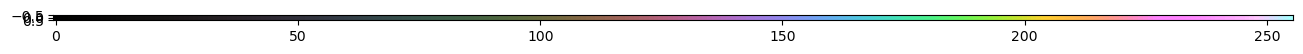

In [27]:
def get_cube_helix_colormap(start_color=0, rotations=-0.01, hue=1/255, gamma=1.):
    mat = np.array([-0.14861, 1.78277, -0.29227, -0.90649, 1.97294, 0]).reshape(3,2)
    
    cube_helix_colormap = []
    for lamb in range(256):
        a = ((hue*lamb**gamma * (1-lamb**gamma))/2)
        phi = 2*np.pi*(start_color/3+rotations*lamb)
        cube_helix = lamb**gamma + a*mat @ np.array([np.cos(phi), np.sin(phi)])
        cube_helix_colormap.append(cube_helix)
    return np.clip(cube_helix_colormap, 0, 255).astype("uint8").reshape(256,3)
 

cube_helix_colormap = get_cube_helix_colormap()

plt.figure(figsize=(16,5))
plt.imshow(cube_helix_colormap.reshape(1, 256, 3));   

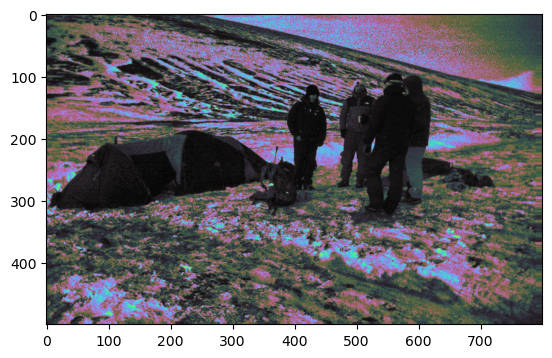

In [235]:
plt.imshow(np.array(mapping)[frame_ahe]);